In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV
from lifelines.utils.sklearn_adapter import sklearn_adapter
from lifelines import KaplanMeierFitter
from lifelines import CoxPHFitter
from sklearn.feature_selection import SelectFromModel
from scipy import stats
from math import sqrt

In [2]:
os.chdir('C:\\Users\\U0033207PC\\Desktop\\GENE Enrichment\\FINAL VISUALISATION')#setting the right directory

In [3]:
# Importing the dataset
dt = pd.read_csv('BIOMARKERS.csv')

In [4]:
dt.head(2)

,HUG0_SYMBOL,FACOAL161,FACOAL226,FAOXC180x,FAOXC200180x,LPS2e,FAOXC22C20x,FAOXC5C5OHm,FOLR2,MTHFC,MTHFD2,MTHFDm,MTHFR3,PGI,GAPD,LDH_L,PGK,PGM,Patient's Vital Status,Overall Survival (Months)
0,TCGA-05-4244-01,492.278261,7.079644,72.493260,72.493260,61.853054,73.132205,738.25540,108.397948,270.35413,56.871599,-297.748823,140.623096,-1030.983679,1166.701897,762.687695,-1166.701897,-749.960368,1,0.00
1,TCGA-05-4249-01,310.135139,-9.551541,56.620656,56.620656,140.936419,56.620656,652.09649,48.449442,382.29994,161.789575,-167.948581,53.053610,-948.109308,597.786528,205.141506,-597.786528,-631.433024,1,50.03


In [5]:
dc = "Overall Survival (Months)"; 
ec = "Patient\'s Vital Status"

base_class = sklearn_adapter(CoxPHFitter, event_col=ec)
cph = base_class()

dt_ = dt.drop('HUG0_SYMBOL', axis=1)

y = dt_.pop(dc).values
z1 = dt_.pop(ec).values
X = dt_

In [6]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test, z1_train, z1_test = train_test_split(X, y, z1, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val, z1_train, z1_val = train_test_split(X_train, y_train, z1_train, test_size=0.2, random_state=0)

In [7]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
X_val = sc_X.transform(X_val)

In [8]:
conc1 = np.vstack(X_train)
conc2 = np.vstack(X_test)
conc3 = np.vstack(X_val)

X_train = pd.DataFrame(conc1, columns=['FACOAL161','FACOAL226','FAOXC180x','FAOXC200180x','LPS2e','FAOXC22C20x','FAOXC5C5OHm','FOLR2','MTHFC','MTHFD2','MTHFDm','MTHFR3','PGI','GAPD','LDH_L','PGK','PGM'
])
X_test = pd.DataFrame(conc2, columns=['FACOAL161','FACOAL226','FAOXC180x','FAOXC200180x','LPS2e','FAOXC22C20x','FAOXC5C5OHm','FOLR2','MTHFC','MTHFD2','MTHFDm','MTHFR3','PGI','GAPD','LDH_L','PGK','PGM'
])
X_val = pd.DataFrame(conc3, columns=['FACOAL161','FACOAL226','FAOXC180x','FAOXC200180x','LPS2e','FAOXC22C20x','FAOXC5C5OHm','FOLR2','MTHFC','MTHFD2','MTHFDm','MTHFR3','PGI','GAPD','LDH_L','PGK','PGM'
])

conc4 = np.vstack(z1_train)
conc5 = np.vstack(z1_test)
conc6 = np.vstack(z1_val)

z1_train = pd.DataFrame(conc4, columns=['Patient\'s Vital Status'])
z1_test = pd.DataFrame(conc5, columns=['Patient\'s Vital Status'])
z1_val = pd.DataFrame(conc6, columns=['Patient\'s Vital Status'])

In [9]:
X_train = X_train.merge(z1_train,left_index=True,right_index=True)
X_val = X_val.merge(z1_val,left_index=True,right_index=True)
X_test = X_test.merge(z1_test,left_index=True,right_index=True)

In [10]:
X_val

,FACOAL161,FACOAL226,FAOXC180x,FAOXC200180x,LPS2e,FAOXC22C20x,FAOXC5C5OHm,FOLR2,MTHFC,MTHFD2,MTHFDm,MTHFR3,PGI,GAPD,LDH_L,PGK,PGM,Patient's Vital Status
0,-0.002182,-0.368284,-0.497826,-0.497826,0.026441,-0.144888,-0.197049,0.191822,2.831092,2.063802,-0.495277,-0.358348,-1.617143,0.228887,1.079373,-0.286376,0.195624,0
1,-0.057812,0.843187,1.542074,1.542074,-0.673636,1.543322,-1.186645,-0.120647,-0.583884,0.002194,-0.219348,0.931395,1.433326,-0.589717,0.849960,0.552728,0.807387,1
2,-0.497906,-1.614596,-0.984738,-0.984738,0.057455,-1.038668,-0.119423,-0.412138,-0.669292,-0.441071,-0.298550,-0.179464,0.418628,0.830310,-1.085667,0.048916,-1.367752,1
3,0.490744,-1.920249,-1.377413,-1.377413,1.452743,-1.439918,0.246087,0.775224,-0.085417,-0.128355,-0.630527,1.010381,1.197757,-0.567944,-0.313240,0.530410,0.732887,1
4,-0.373460,1.646897,1.583232,1.583232,0.602605,1.585379,1.464895,0.387522,0.066040,0.063738,-0.532700,0.419249,0.214244,-0.446041,-0.073973,0.405454,0.753551,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,-0.383931,0.098171,0.195622,0.195622,-0.316303,0.167467,-1.015997,-0.617753,-0.934107,-0.645815,0.647023,-0.419052,-0.456430,-0.886408,-0.341577,0.856849,0.920683,0
79,0.736368,-0.021115,-0.005054,-0.005054,-1.125172,-0.008301,-0.770868,1.644545,-0.893464,-1.733705,0.200575,2.104251,-1.851742,6.604647,0.292956,-6.821802,-4.829679,1
80,-0.224343,0.257075,1.479167,1.479167,0.783199,1.479041,0.573673,-0.038910,-0.188665,0.125994,-0.804178,0.564059,0.277391,-0.591093,0.261932,0.554139,0.234853,1
81,-0.164228,0.516268,0.160874,0.160874,0.679625,0.131960,0.559387,-0.177160,1.508306,1.383434,0.541629,-0.411915,-0.200293,-0.438457,-0.597041,0.397680,0.752848,1


In [11]:
X_train

,FACOAL161,FACOAL226,FAOXC180x,FAOXC200180x,LPS2e,FAOXC22C20x,FAOXC5C5OHm,FOLR2,MTHFC,MTHFD2,MTHFDm,MTHFR3,PGI,GAPD,LDH_L,PGK,PGM,Patient's Vital Status
0,4.212048,-0.021115,-0.005054,-0.005054,0.349857,-0.008301,-0.978166,2.980212,0.938178,-0.792268,-0.892517,-0.336050,-0.185011,-0.438457,3.221680,0.397680,0.454296,0
1,0.758576,-0.021115,-0.005054,-0.005054,3.205051,-0.008301,-0.311967,1.691729,2.081788,0.148670,0.125287,-1.868881,-2.406522,0.315745,2.496046,-0.375409,-0.047791,1
2,-0.264589,0.852835,0.517572,0.517572,0.194103,0.496448,0.739743,-0.385253,2.085061,1.936068,0.568943,-0.878727,0.088165,-0.386872,-0.553285,0.397680,-0.220784,1
3,0.120383,0.073820,0.751662,0.751662,0.078503,0.735650,-1.225926,-0.051584,0.115094,0.218221,-0.773366,0.364096,0.607335,-0.772237,0.651652,0.739819,0.867246,1
4,-0.181982,-0.579866,0.567631,0.567631,0.266115,0.547601,-1.384293,0.205282,0.072087,0.363239,-0.788244,0.676312,-1.238223,-0.546929,-0.002530,0.508869,0.862182,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,0.477063,-2.377039,-2.665715,-2.665715,2.387034,-2.756352,-0.938020,0.630637,1.073185,0.596579,-1.674836,0.031173,0.041699,-0.124950,-0.379613,0.076322,0.556589,1
326,-0.258486,1.182885,-0.064899,-0.064899,-0.941586,-0.098743,1.291708,-0.846390,1.031329,0.973427,1.549299,-1.193223,0.896971,-0.431049,-0.775058,0.390087,0.225763,0
327,-0.383950,0.855197,1.634510,1.634510,-0.180730,1.637776,0.553179,-0.075518,0.212081,0.576413,-0.051651,0.081183,-1.322151,-0.206876,0.138435,0.160300,0.509802,1
328,-0.158431,1.364144,2.144112,2.144112,1.067529,2.158507,1.984219,0.306529,1.038252,1.560529,-1.592217,1.084294,0.847949,-0.814890,0.451432,0.783540,0.844078,1


In [12]:
X_test

,FACOAL161,FACOAL226,FAOXC180x,FAOXC200180x,LPS2e,FAOXC22C20x,FAOXC5C5OHm,FOLR2,MTHFC,MTHFD2,MTHFDm,MTHFR3,PGI,GAPD,LDH_L,PGK,PGM,Patient's Vital Status
0,0.359749,0.054799,-0.968519,-0.968519,0.016226,-1.022095,0.334343,-0.578023,2.653156,2.217650,-0.804813,-1.445992,-0.868313,0.064026,-0.392032,-0.117386,0.773241,0
1,-0.357409,-0.182674,0.187655,0.187655,-0.859998,0.159327,-0.786924,-0.702365,-0.530231,0.043602,0.157989,-0.230554,0.803917,-0.797307,-0.166729,0.765517,0.695626,1
2,0.242386,-0.073076,-0.848989,-0.848989,-1.247931,-0.899955,1.984219,1.616450,-0.059741,-1.104876,-0.551711,2.292514,-1.596387,2.027411,0.752002,-2.129940,0.939180,0
3,-0.305133,-1.783190,-1.118688,-1.118688,1.266315,-1.175543,-1.089530,-0.308626,-0.708318,-0.343376,-0.509707,0.680647,0.213173,-0.759854,-0.150167,0.727126,-0.373765,1
4,0.028033,0.380762,-0.006351,-0.006351,0.073328,-0.038916,1.099441,-0.401581,1.325283,1.610143,-0.244642,-0.028498,-1.052937,-0.802996,-0.005334,0.771348,0.841308,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,-0.217312,-0.309754,-0.133178,-0.133178,0.403801,-0.168513,-0.017009,0.083367,0.009554,0.233301,-0.072494,0.360212,0.980176,-0.438457,-0.222054,0.397680,0.826970,1
100,-0.250429,0.410981,1.116606,1.116606,-0.735507,1.108563,-0.886464,-0.788002,-0.628756,-0.044409,0.348389,-0.162895,1.424564,-0.564723,0.160377,0.527108,0.427306,1
101,-0.460457,0.698189,1.166275,1.166275,-0.448175,1.159317,-0.707033,-0.745154,0.461941,0.599049,0.505941,-0.609083,-0.281727,1.063180,-0.632420,-1.141562,-1.541517,0
102,-0.823030,-0.700817,-0.704793,-0.704793,-0.247983,-0.752610,-0.317700,-0.488154,-0.388438,-0.065730,0.442716,-0.333752,0.132519,-0.688818,-0.533582,0.654311,0.901842,0


In [13]:
base_class = sklearn_adapter(CoxPHFitter, event_col='Patient\'s Vital Status')
cph = base_class(penalizer=0.1)

In [14]:
cph.fit(X_train, y_train)

SkLearnCoxPHFitter(penalizer=0.1, strata=None, tie_method='Efron')

In [15]:
cph.score(X_train, y_train)

0.6167705959947236

In [16]:
# KFOlD
estimator = cph
kfold = KFold(n_splits=5)
results = cross_val_score(estimator, X_train, y_train, cv=kfold)
print(results.mean(), results.std())

0.5622966447231709 0.019224785814110513


The median survival time: 28.98


c:\python\python37\lib\site-packages\lifelines\fitters\kaplan_meier_fitter.py:262: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  self.confidence_interval_ = self._bounds(cumulative_sq_[:, None], alpha, ci_labels)


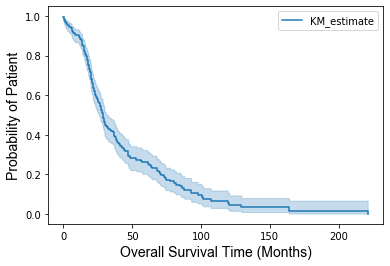

In [17]:
kmf = KaplanMeierFitter()
kmf.fit(y_train, z1_train)
# Plot Kaplan-Meier graph:

kmf.plot_survival_function()
plt.xlabel("Overall Survival Time (Months)", fontname="Arial", fontsize=14)
plt.ylabel("Probability of Patient", fontname="Arial", fontsize=14)

# The median number of months:

print("The median survival time:", kmf.median_survival_time_)


In [18]:
y_predval = cph.predict(X_val)
y_predval

array([ 38.73735779,  39.02721713,  74.83442048,  32.49371443,
        33.43608342,  54.52560108,  58.45269134,  28.69578987,
        35.94765814,  23.48191254,  53.14122928,  55.78308121,
        58.94672629,  31.18272966,  58.52934384,  36.30281056,
        54.29119596,  33.63179419,  44.89803265,  48.93331133,
        31.40618459,  33.53890995,  43.43077995,  22.19135005,
        45.71778397,  54.86672659,  35.60108341,  36.09420351,
        39.81738108,  34.48901988,  61.4894514 ,  65.38993847,
        22.55756086,  51.26941323, 111.1273003 ,  48.94127843,
        28.03241137,  54.59231079,  33.60216715,  47.53123313,
        60.81138816,  44.82015987,  51.98563148,  49.58918002,
        54.09812902,  68.20831379,  99.04429551,  39.07247538,
        34.23996208,  48.48216256,  29.75617476,  25.05385395,
        38.92136114,  67.52552114,  60.96601661,  47.48302819,
       143.34376249,  52.34212298,  55.05899039,  49.01953421,
        35.34748641,  55.38140314,  45.16459847,  54.10

In [19]:
cph.lifelines_model.print_summary()

In [20]:
kmf = KaplanMeierFitter()

In [21]:
kmf.fit(y_predval, z1_val)

c:\python\python37\lib\site-packages\lifelines\fitters\kaplan_meier_fitter.py:262: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  self.confidence_interval_ = self._bounds(cumulative_sq_[:, None], alpha, ci_labels)


<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 83 total observations, 28 right-censored observations>

Text(0, 0.5, 'Probability of Patient')

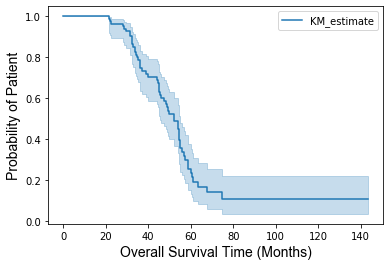

In [22]:
# Plot Kaplan-Meier graph:

kmf.plot_survival_function()
plt.xlabel("Overall Survival Time (Months)", fontname="Arial", fontsize=14)
plt.ylabel("Probability of Patient", fontname="Arial", fontsize=14)

In [23]:
# The median number of months:

print("The median survival time:", kmf.median_survival_time_)

The median survival time: 52.34212297941721


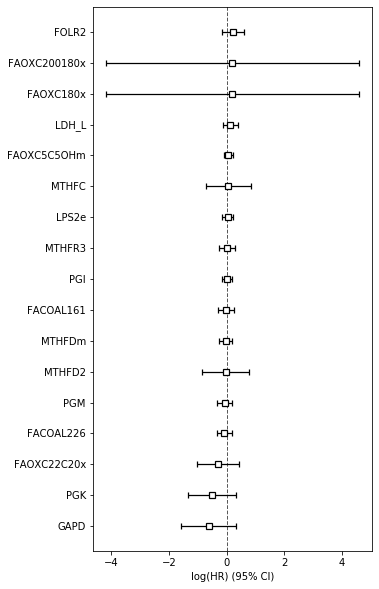

In [24]:
fig1  = plt.figure(figsize=(5,10), edgecolor="red")
ax = fig1.add_subplot(111)
cph.lifelines_model.plot(ax=ax)
plt.savefig(r'C:\Users\U0033207PC\Desktop\GENE Enrichment\FINAL VISUALISATION\PLOTS\17_BIOMARKERS_CPH.pdf', bbox_inches="tight")

In [25]:
y_predtest = cph.predict(X_test)
y_predtest

array([52.24404225, 50.10223837, 33.36013911, 39.38775524, 41.33387589,
       24.81025892, 24.5808937 , 51.20379828, 49.81747252, 42.2355425 ,
       27.00766161, 45.80041708, 33.89803943, 52.277969  , 32.59488292,
       40.38789095, 44.63884669, 50.68536859, 36.93040074, 34.14363568,
       58.74624857, 32.82652341, 52.4171716 , 59.86934608, 55.02273502,
       30.05453713, 56.78986235, 55.57694175, 38.6443845 , 29.65398873,
       46.89841094, 52.9662492 , 36.15168527, 34.14285476, 21.12152253,
       41.6871252 , 26.4547721 , 31.88340433, 43.92496143, 39.74605928,
       52.98605398, 47.55151666, 38.84310057, 43.24761327, 52.95017407,
       43.80642871, 45.57645337, 42.66315624, 17.92632326, 54.02496166,
       45.69607812, 46.51910858, 49.74171163, 62.2987499 , 29.03730228,
       48.10909235, 46.4121738 , 45.79587309, 45.4360376 , 22.30884281,
       47.24461841, 41.05263857, 36.65311433, 29.58698458, 63.04346474,
       52.12046085, 40.94676331, 57.06548283, 22.30763282, 53.05

In [26]:
kmf = KaplanMeierFitter()

In [27]:
kmf.fit(y_predtest, z1_test)

c:\python\python37\lib\site-packages\lifelines\fitters\kaplan_meier_fitter.py:262: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  self.confidence_interval_ = self._bounds(cumulative_sq_[:, None], alpha, ci_labels)


<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 104 total observations, 41 right-censored observations>

In [28]:
# Print the event table:

kmf.event_table

# Removed = Observed + Censored
# Censored = Person that didn't die.
# Observed = Persons that died.

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0.000000,0,0,0,104,104
17.926323,1,0,1,0,104
21.121523,1,1,0,0,103
22.115640,1,0,1,0,102
22.307633,1,1,0,0,101
...,...,...,...,...,...
62.298750,1,1,0,0,5
63.043465,1,1,0,0,4
64.254152,1,1,0,0,3


In [29]:
# To get full list of survival probability for the whole timeline:

print(kmf.survival_function_)

           KM_estimate
timeline              
0.000000      1.000000
17.926323     1.000000
21.121523     0.990291
22.115640     0.990291
22.307633     0.980486
...                ...
62.298750     0.144764
63.043465     0.108573
64.254152     0.072382
66.307947     0.036191
79.035458     0.000000

[105 rows x 1 columns]


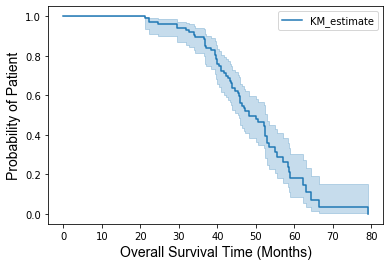

In [30]:
# Plot Kaplan-Meier graph:

kmf.plot_survival_function()
plt.xlabel("Overall Survival Time (Months)", fontname="Arial", fontsize=14)
plt.ylabel("Probability of Patient", fontname="Arial", fontsize=14)
plt.savefig(r'C:\Users\U0033207PC\Desktop\GENE Enrichment\FINAL VISUALISATION\PLOTS\17_BIOMARKERS_KM.pdf', bbox_inches="tight")

In [31]:
# The median number of months:

print("The median survival time:", kmf.median_survival_time_)

The median survival time: 48.20846098579917


In [32]:
# Survival probability with confidence interval:

kmf.confidence_interval_survival_function_

,KM_estimate_lower_0.95,KM_estimate_upper_0.95
0.000000,1.000000,1.000000
17.926323,1.000000,1.000000
21.121523,0.933084,0.998627
22.115640,0.933084,0.998627
22.307633,0.924224,0.995084
...,...,...
62.298750,0.057473,0.270463
63.043465,0.033507,0.234180
64.254152,0.014905,0.194124
66.307947,0.003001,0.150122


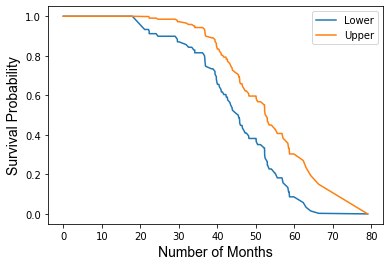

In [33]:
# Plot survival function with confidence interval:

confidence_surv_func = kmf.confidence_interval_survival_function_

plt.plot(confidence_surv_func["KM_estimate_lower_0.95"], label="Lower")
plt.plot(confidence_surv_func["KM_estimate_upper_0.95"], label="Upper")
plt.xlabel("Number of Months", fontname="Arial", fontsize=14)
plt.ylabel("Survival Probability", fontname="Arial", fontsize=14)
plt.legend()
plt.savefig(r'C:\Users\U0033207PC\Desktop\GENE Enrichment\FINAL VISUALISATION\PLOTS\17_BIOMARKERS_KM_CI.pdf', bbox_inches="tight")

In [34]:
# Probability of a subject dying:

kmf.cumulative_density_

,KM_estimate
timeline,
0.000000,0.000000
17.926323,0.000000
21.121523,0.009709
22.115640,0.009709
22.307633,0.019514
...,...
62.298750,0.855236
63.043465,0.891427
64.254152,0.927618


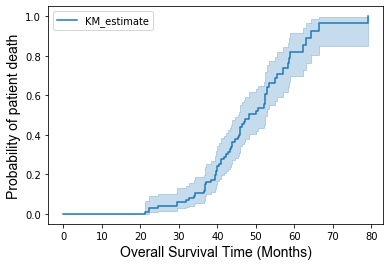

In [35]:
# Plot the cumulative density graph:

kmf.plot_cumulative_density()
plt.xlabel("Overall Survival Time (Months)", fontname="Arial", fontsize=14)
plt.ylabel("Probability of patient death", fontname="Arial", fontsize=14)
plt.savefig(r'C:\Users\U0033207PC\Desktop\GENE Enrichment\FINAL VISUALISATION\PLOTS\17_BIOMARKERS_KMCD.pdf', bbox_inches="tight")

In [36]:
# Cumulative density with confidence interval:

kmf.confidence_interval_cumulative_density_

,KM_estimate_lower_0.95,KM_estimate_upper_0.95
0.000000,0.000000,0.000000
17.926323,0.000000,0.000000
21.121523,0.066916,0.001373
22.115640,0.066916,0.001373
22.307633,0.075776,0.004916
...,...,...
62.298750,0.942527,0.729537
63.043465,0.966493,0.765820
64.254152,0.985095,0.805876
66.307947,0.996999,0.849878


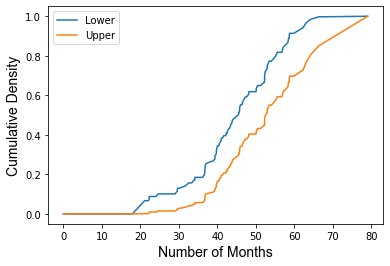

In [37]:
# Plot survival function with confidence interval:

confidence_cumulative_density = kmf.confidence_interval_cumulative_density_

plt.plot(kmf.confidence_interval_cumulative_density_["KM_estimate_lower_0.95"], label="Lower")
plt.plot(kmf.confidence_interval_cumulative_density_["KM_estimate_upper_0.95"], label="Upper")
plt.xlabel("Number of Months", fontname="Arial", fontsize=14)
plt.ylabel("Cumulative Density", fontname="Arial", fontsize=14)
plt.legend()
plt.savefig(r'C:\Users\U0033207PC\Desktop\GENE Enrichment\FINAL VISUALISATION\PLOTS\17_BIOMARKERS_KMCD_CI.pdf', bbox_inches="tight")

In [38]:
# Conditional median time to event of interest:

kmf.conditional_time_to_event_

,KM_estimate - Conditional median duration remaining to event
timeline,
0.000000,48.208461
17.926323,30.282138
21.121523,27.086938
22.115640,26.092821
22.307633,27.794606
...,...
62.298750,1.955403
63.043465,3.264482
64.254152,2.053794


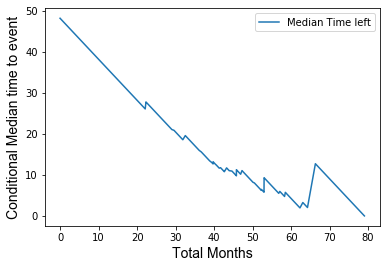

In [39]:
#Conditional median time left for event:

median_time_to_event = kmf.conditional_time_to_event_
plt.plot(median_time_to_event,label="Median Time left")
plt.xlabel("Total Months", fontname="Arial", fontsize=14)
plt.ylabel("Conditional Median time to event", fontname="Arial", fontsize=14)
plt.legend()
plt.savefig(r'C:\Users\U0033207PC\Desktop\GENE Enrichment\FINAL VISUALISATION\PLOTS\17_BIOMARKERS_MEDIAN.pdf', bbox_inches="tight")

In [40]:
# The median number of days:

print("The median survival time:", kmf.median_survival_time_)

The median survival time: 48.20846098579917
